In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from sir_model import Parameters, R0, model, B, Delta_0, h
import visualization

## Task 5/5: Bifurcations in crowd dynamics

### General Showcase of visualization plots

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <= d + nu + mu0. This is False


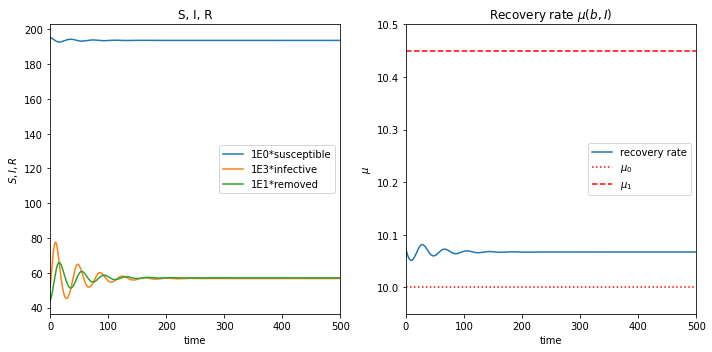

In [2]:
#create default parameters
param = Parameters()

#information
print("Reproduction number R0=", R0(param.beta, param.delta, param.nu, param.mu1))
print('Globally asymptotically stable if beta <= d + nu + mu0. This is', param.beta <= param.delta+param.nu+param.mu0)

#show system for initial values
SIR0 = [195.3, 0.052, 4.4]

#simulation steps
t_0 = 0
t_end = 1000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT)

#for indicator function
I_h = np.linspace(-0.0,0.05,100)

#create figure
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0, t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='LSODA', rtol=param.rtol, atol=param.atol)
axes[0] = visualization.sir_2d(sol, axes[0])
axes[0].set_title("S, I, R")
axes[1] = visualization.recovery_rate(sol, param, axes[1])
axes[1].set_title("Recovery rate $\mu(b,I)$")
plt.tight_layout()
plt.savefig("task5/default_parameters.png")

### Variate b for (S0,I0,R0) = (195.3,0.052,4.4) and chose which diagram to show for three b values around 0.022

For b = 0.021: B = -5.453 and Delta_0 = 19.947
For b = 0.022: B = -5.332 and Delta_0 = 18.173
For b = 0.023: B = -5.211 and Delta_0 = 16.429


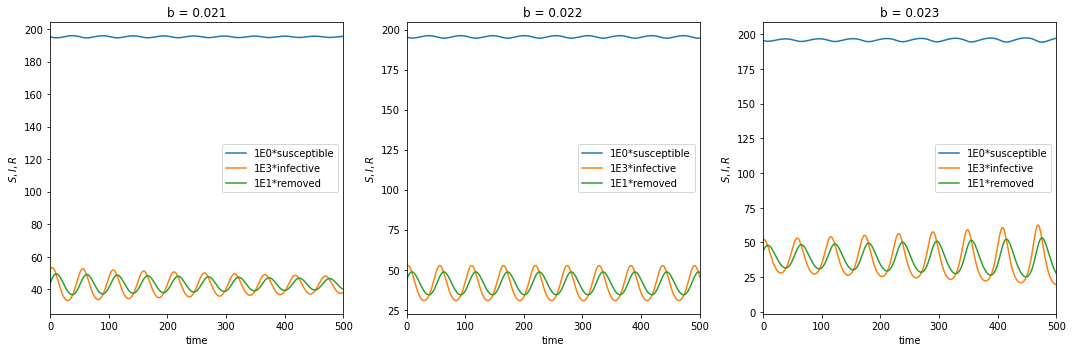

In [3]:
#simulation specific
SIR0 = [195.3, 0.052, 4.4]
bs = np.arange(0.021, 0.024,0.001)

#simulation steps
t_0 = 0
t_end = 1000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT)

#for indicator function
I_h = np.linspace(-0.0,0.05,100)

#create figure
numRows = 1
numColumns = 3
figsize = 5
fig, axes = plt.subplots(numRows, numColumns, figsize=(numColumns*figsize,numRows*figsize))

for j in range(numColumns):
    param = Parameters(b=bs[j])
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0, t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='LSODA', rtol=param.rtol, atol=param.atol)
    
    #change the following lines to decide which plot to show
    axes[j] = visualization.sir_2d(sol, axes[j])
    #axes[j] = visualization.recovery_rate(sol, param, axes[j])
    #axes[j] = visualization.indicator_function(I_h, param, axes[j])
    
    #set title
    axes[j].set_title(f"b = {param.b:0.3f}")
    
    #output for equilibria classification
    print(f'For b = {bs[j]:0.3f}: B = {B(param):0.3f} and Delta_0 = {Delta_0(param):0.3f}')

plt.tight_layout()
fig.savefig("task5/sir_b_variation_1953.png")

### Variate b for (S0,I0,R0) = (195.3,0.052,4.4) and plot phase portrait

For b = 0.021: Test = 0.075
For b = 0.022: Test = 0.075
For b = 0.023: Test = 0.075


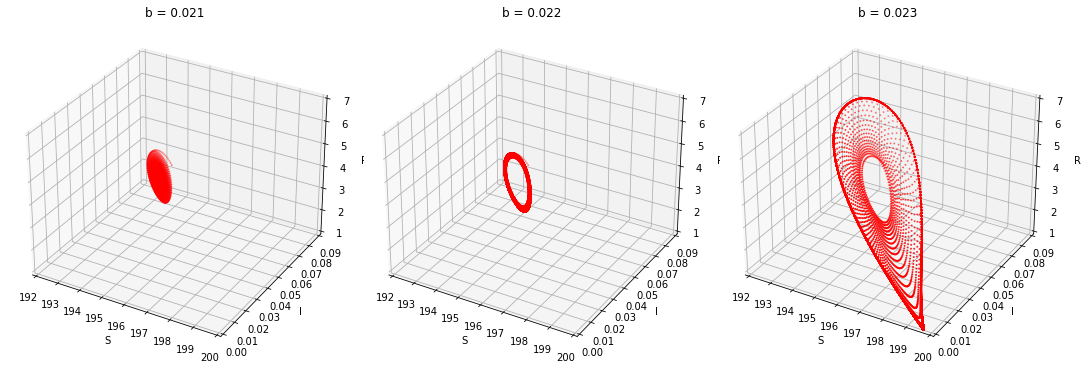

In [4]:
#simulation specific
SIR0 = [195.3, 0.052, 4.4]
bs = np.arange(0.021, 0.024,0.001)

#simulation steps
t_0 = 0
t_end = 11000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT*3)

#create figure
numRows = 1
numColumns = 3
figsize = 5
fig, axes = plt.subplots(numRows, numColumns, figsize=(numColumns*figsize,numRows*figsize), subplot_kw=dict(projection='3d'))

for j in range(numColumns):
    param = Parameters(b=bs[j])
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0, t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes[j] = visualization.sir_3d(sol, time, axes[j], 2, color='r')
    axes[j].set_title(f"b = {param.b:0.3f}")
    test = (param.A * (param.mu1 - param.mu0)) / (param.beta * (param.beta - param.nu))
    print(f'For b = {bs[j]:0.3f}: Test = {test:0.3f}')

plt.tight_layout()
fig.savefig("task5/sir_bifurcation_b_variation_1953.png")

### Variate b for (S0,I0,R0) = (195.7, 0.03, 3.92) and plot phase portrait

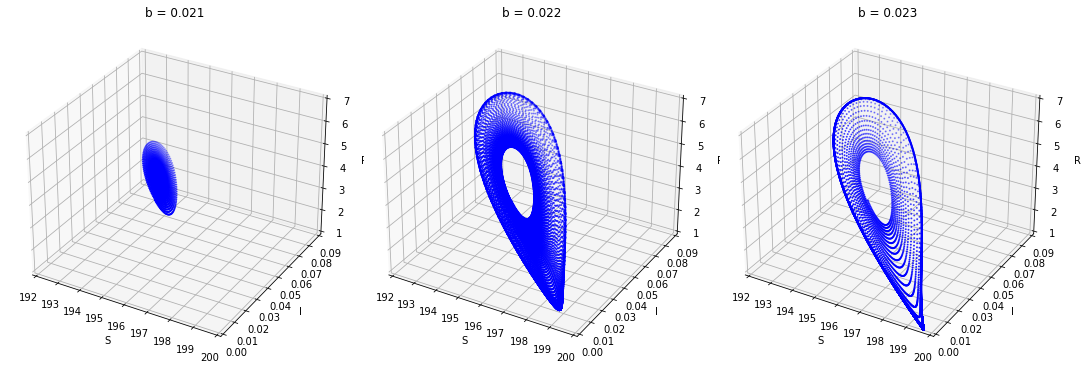

In [5]:
#simulation specific
SIR0 = [195.7, 0.03, 3.92]
bs = np.arange(0.021, 0.024,0.001)

#simulation steps
t_0 = 0
t_end = 8000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT*2)

#create figure
numRows = 1
numColumns = 3
figsize = 5
fig, axes = plt.subplots(numRows, numColumns, figsize=(numColumns*figsize,numRows*figsize), subplot_kw=dict(projection='3d'))

for j in range(numColumns):
    param = Parameters(b=bs[j])
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0, t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes[j] = visualization.sir_3d(sol, time, axes[j], 1, color='b')
    axes[j].set_title(f"b = {param.b:0.3f}")

plt.tight_layout()
fig.savefig("task5/sir_bifurcation_b_variation_1957.png")

### Variate b for (S0,I0,R0) = (193, 0.08, 6.21) and plot phase portrait

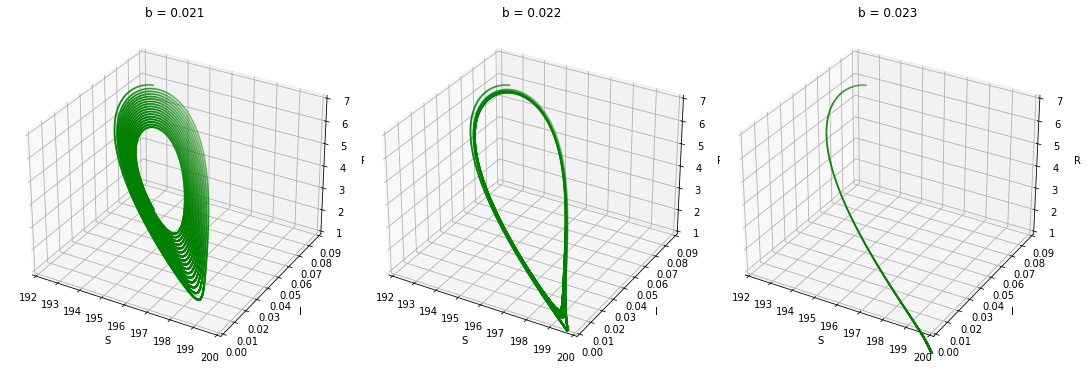

In [6]:
#simulation specific
SIR0 = [193.0, 0.08, 6.21]
bs = np.arange(0.021, 0.024,0.001)

#simulation steps
t_0 = 0
t_end = 1000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT*10)

#create figure
numRows = 1
numColumns = 3
figsize = 5
fig, axes = plt.subplots(numRows, numColumns, figsize=(numColumns*figsize,numRows*figsize), subplot_kw=dict(projection='3d'))

for j in range(numColumns):
    param = Parameters(b=bs[j])
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0, t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes[j] = visualization.sir_3d(sol, time, axes[j], 1, color='g')
    axes[j].set_title(f"b = {param.b:0.3f}")

plt.tight_layout()
fig.savefig("task5/sir_bifurcation_b_variation_193.png")

### Project all three initial values and their trajectories into one 2d plot for b=0.022

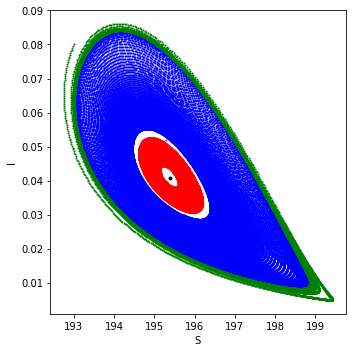

In [7]:
#show all three trajectories in one picture as a 2d projection
param = Parameters()
SIR0s = [[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [193.0, 0.08, 6.21]]
colors = ['r','b','g']
#simulation steps
t_0 = 0
t_end = 10000
NT = t_end-t_0
times = [np.linspace(t_0,25000,NT), np.linspace(t_0,t_end,NT*10), np.linspace(t_0,t_end,NT*10)]

#create figure
figsize = 5
fig2d, axes2d = plt.subplots(1, 1, figsize=(figsize,figsize))

for j in range(len(SIR0s)):
    sol = solve_ivp(model, t_span=[times[j][0],times[j][-1]], y0=SIR0s[j], t_eval=times[j], args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, 0.022), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes2d = visualization.sir_2d_projection(sol, times[j], axes2d, 1, colors[j])

#plot also endemic equilibrium (calculated by hand using fromulae from paper)
axes2d.plot(195.3957,0.0409, '.', color='k')
plt.tight_layout()
plt.savefig("task5/sir_all_trajectories_b_0022.png")


### Plot indicator function to showcase Hopf bifurcation for higher endemic equilibrium

In [8]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

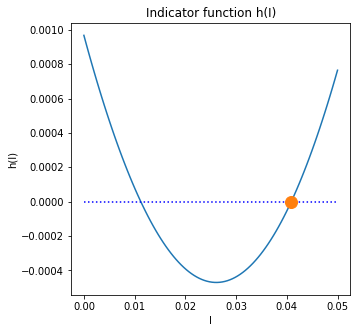

In [9]:
#plot indicator function
I_h = np.linspace(-0.0,0.05,100)

figsize = 5
fig, axes = plt.subplots(1, 1, figsize=(figsize,figsize))

param = Parameters(b=0.022)

axes = visualization.indicator_function(I_h, param, axes)

hs = []
for i in range(len(I_h)):
    hs.append(h(I_h[i], param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b))

#visualize the root with higher endemicity
axes.plot(I_h[find_nearest(hs, 0.0)], 0, marker='o', markersize=12)
axes.set_title("Indicator function h(I)")

plt.savefig("task5/indicator_function.png")


### Explore other type of bifurcation -> Backward bifurcation

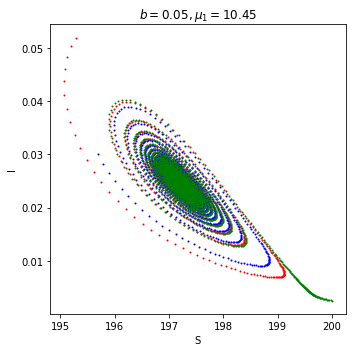

In [10]:
#new parameters which lead to R0 = 1 and b according to fourmula for backward bifurcation ( < 0.073...)
param = Parameters(beta=11.55, b=0.05)

#new initial values (one near disease free equilibrium)
SIR0s = [[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [200.001, 0.0025, 0.0021]]

colors = ['r','b','g']
#simulation steps
t_0 = 0
t_end = 20000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT)

#create figure
figsize = 5
fig2d, axes2d = plt.subplots(1, 1, figsize=(figsize,figsize))

for j in range(len(SIR0s)):
    param = Parameters(beta=11.55, b=0.05)
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0s[j], t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes2d = visualization.sir_2d_projection(sol, time, axes2d, 1, colors[j])

axes2d.set_title(r'$b=0.05, \mu_1=10.45$')
plt.tight_layout()
plt.savefig("task5/sir_all_trajectories_b_0022_test_line.png")

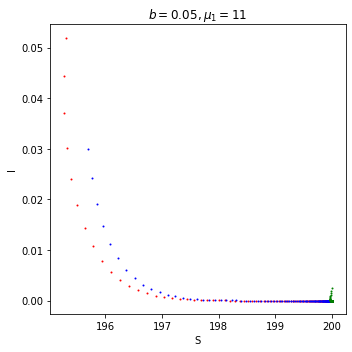

In [11]:
#we adapt the second bifurcation parameter mu1 to move to the right of the line (R0 < 1)
param = Parameters(beta=11.55, b=0.05, mu1=11)

#same initial values
SIR0s = [[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [200.001, 0.0025, 0.0021]]

colors = ['r','b','g']
#simulation steps
t_0 = 0
t_end = 20000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT*2)

#create figure
figsize = 5
fig2d, axes2d = plt.subplots(1, 1, figsize=(figsize,figsize))

for j in range(len(SIR0s)):
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0s[j], t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes2d = visualization.sir_2d_projection(sol, time, axes2d, 1, colors[j])

axes2d.set_title(r'$b=0.05, \mu_1=11$')
plt.tight_layout()
plt.savefig("task5/sir_all_trajectories_b_0022_test_right.png")

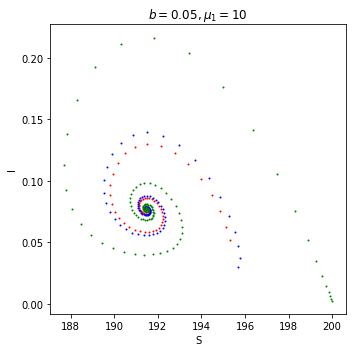

In [12]:
#we adapt the second bifurcation parameter mu1 to move to the left of the line (R0 > 1)
param = Parameters(beta=11.55, b=0.05, mu1=10)

#same initial values
SIR0s = [[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [200.001, 0.0025, 0.0021]]

colors = ['r','b','g']
#simulation steps
t_0 = 0
t_end = 20000
NT = t_end-t_0
time = np.linspace(t_0,t_end,NT)

#create figure
figsize = 5
fig2d, axes2d = plt.subplots(1, 1, figsize=(figsize,figsize))

for j in range(len(SIR0s)):
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIR0s[j], t_eval=time, args=(param.mu0, param.mu1, param.beta, param.A, param.delta, param.nu, param.b), method='DOP853', rtol=param.rtol, atol=param.atol)
    axes2d = visualization.sir_2d_projection(sol, time, axes2d, 1, colors[j])

axes2d.set_title(r'$b=0.05, \mu_1=10$')
plt.tight_layout()
plt.savefig("task5/sir_all_trajectories_b_0022_test_left.png")